In [4]:
## git clone https://github.com/CSSEGISandData/COVID-19.git


In [1]:
path = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

In [2]:
d1 = "time_series_covid19_confirmed_global.csv"
d2 = "time_series_covid19_deaths_global.csv"
d3 = "time_series_covid19_recovered_global.csv"




In [3]:
import pandas as pd

In [4]:
dd1 = pd.read_csv(path+d2)

In [5]:
dd1.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/27/20             int64
3/28/20             int64
3/29/20             int64
3/30/20             int64
3/31/20             int64
Length: 74, dtype: object

In [6]:
country = []
for i in dd1['Country/Region'].drop_duplicates():
    country.append(i)
    
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%y')


In [7]:
import json

with open("population_202004010609.json","r") as f:
    dd = json.loads(f.read())


In [8]:
dd['Korea, South'] = dd['South Korea']
dd['US'] = dd['United States']
dd['Czechia'] = dd['Czech Republic (Czechia)']
dd['Taiwan*'] = dd['Taiwan']
dd['Brunei'] = dd['Brunei ']

dd["Cote d'Ivoire"] = dd["Côte d'Ivoire"]


In [9]:
df_0 = dd1.loc[lambda df: df['Country/Region'] == country[0]]
df_0.loc['value', :] = df_0.sum()
data = df_0.T[4:]
data_0 = data #.loc[lambda df: df[country[0]] >100]

data_0 = data_0.loc[lambda df: df['value'] >100]
data_0[country[0]] = data['value']/int(dd[country[0]])

#data_0 = data.loc[lambda df: df[country[0]] >10**-6]
#data_0['date'] = [ dateparse(i) for i in data_0.index ]
data_0['day'] = [ i for i,ii in enumerate(data_0.index) ]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [10]:
len(data_0['day'])

70

In [11]:
data_0

,0,value,Afghanistan,day
1/22/20,NaN,NaN,0,0
1/23/20,NaN,NaN,0,1
1/24/20,NaN,NaN,0,2
1/25/20,NaN,NaN,0,3
1/26/20,NaN,NaN,0,4
...,...,...,...,...
3/27/20,NaN,NaN,1.02753e-07,65
3/28/20,NaN,NaN,1.02753e-07,66
3/29/20,NaN,NaN,1.02753e-07,67
3/30/20,NaN,NaN,1.02753e-07,68


In [12]:
country2 = []
error2 = []
for i in country[1:]:    
    df_1 = dd1.loc[lambda df: df['Country/Region'] == i]
    df_1.loc['value', :] = df_1.sum()

    data_11 = df_1.T[4:]
    data_11 = data_11.loc[lambda df: df['value'] >100]
    try:
        data_11[i] = data_11['value']/int(dd[i])
    except:
        print("--",i,"--")
        error2.append(i)
        continue

    data_1 = data_11
    #data_1 = data_11.loc[lambda df: df[i] >10**-5]
    data_1['day'] = [ j for j,ii in enumerate(data_1.index) ]
    #data1['date'] = [ dateparse(j) for j in data1.index ]
    if len(data_1['day'])>0:    
        data_0 = data_0.merge(data_1, how='outer', on='day')
        country2.append(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


-- Congo (Brazzaville) --
-- Congo (Kinshasa) --
-- Diamond Princess --
-- Saint Vincent and the Grenadines --
-- West Bank and Gaza --
-- Saint Kitts and Nevis --
-- Kosovo --
-- Burma --
-- MS Zaandam --


In [13]:
country2

['Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'China',
 'France',
 'Germany',
 'Indonesia',
 'Iran',
 'Italy',
 'Korea, South',
 'Netherlands',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'US']

In [14]:
df = data_0[country2[:]+['day']]


Text(0, 0.5, 'deathed / population ')

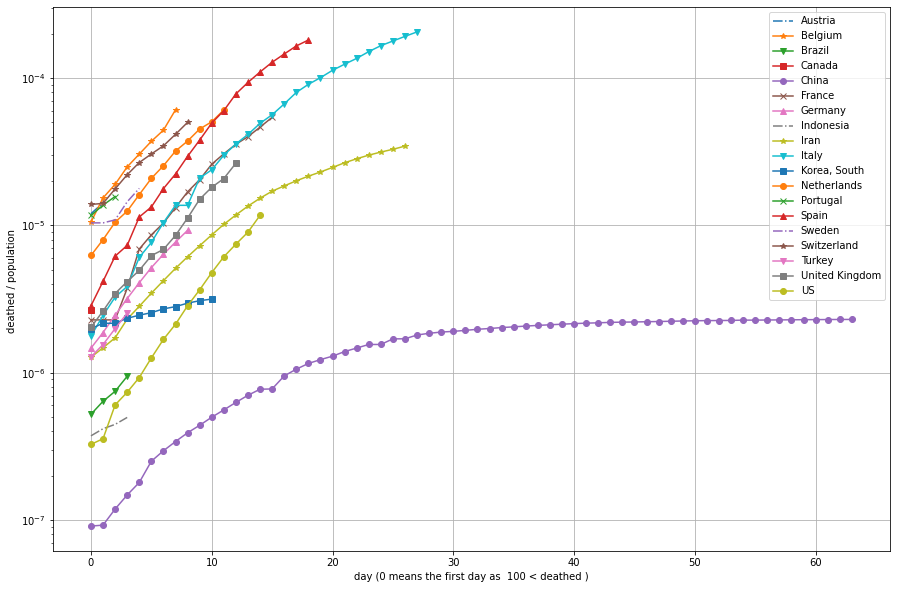

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["figure.facecolor"] = "w"


fig, ax = plt.subplots(figsize=(15, 10))
maker = ["-.",'-*','-v','-s','-o','-x',"-^"]

for i,ii in enumerate(country2[:]):
    df.plot(ax=ax, x="day",y=ii, style=maker[i%7])

#ax.get_legend().remove()
ax.grid(True)
ax.set_yscale('log')
#plt.text(30, 3*10**3, "{}".format("countries of over 1000 people as conformed"), fontsize=12)
ax.set_xlabel('day (0 means the first day as  100 < deathed )')
ax.set_ylabel('deathed / population ')

